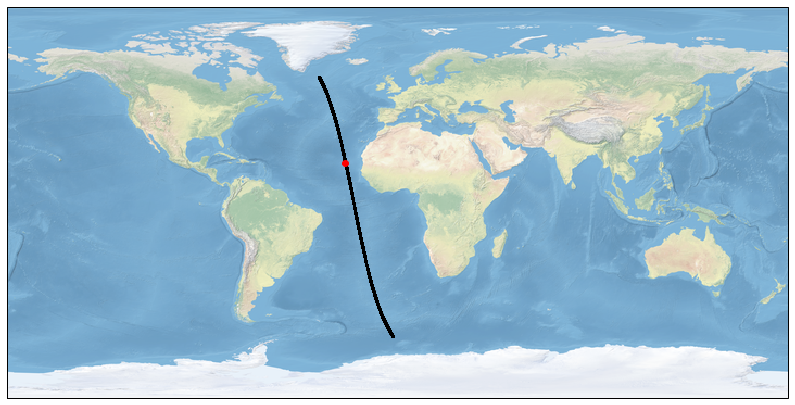

In [3]:
# SWIM SIGMA0 profile visualisation notebook
#:author: Samira Amraoui
#:creation date: 20/03/2020

#This program is free software: you can redistribute it and/or modify it
#under the terms of the GNU Lesser General Public License as published by
#the Free Software Foundation, either version 3 of the License,
#or (at your option) any later version.

#This program is distributed in the hope that it will be useful,
#but WITHOUT ANY WARRANTY; without even the implied warranty of
#MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU Lesser
#General Public License for more details (http://www.gnu.org/licenses/).
#"""

########## warning : needs python with cartopy package  ##################

import numpy as np
import netCDF4 as netcdf
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

############################################################# arguments initilization :##########################################################
#SWIM L1a NetCDF file full path
SWIM_L1a_NC_file_path='/work/ALT/swec/utilitaires/outils_quick_handbook/'
#SWIM L1a NetCDF file full name
SWIM_L1a_NC_file_name='CFO_TEST_SWI_L1A____F_20191105T191631_20191105T205852.nc'

# SWIM number of the macrocycle (a macrocycle is a sequence of beams sequence) for visualisation
num_mcycle=6000

# beam(s) in the beams sequence to visualise : 0 => 0°; 1 => 2°; 3 => 4°; 4 => 8°; 5 => 10°
beam=[0,1,2,3,4,5]

# reliable swath option : True => visualise sigma0 over reliable swath recommended) ; False => visualise sigma0 over whole swath
reliable_swath=True

# axis visualisation option used for swath gate :
 # 1 => incidence values in deg;
 # 2 => elevation values in deg;
 # 3 => radar range values in m;
 # 4 => ground range values in m
x_axis=2

# unit of sigma0 for visualization :
 # 'dB'
 # 'W'
unit_sigma0='dB' 

####################################################### ground track and macrocycle position visualization #############################################

#NetCDF file opening and reading
cdf=netcdf.Dataset(SWIM_L1a_NC_file_path+SWIM_L1a_NC_file_name)

# Plot the nadir point for all boxes along the satellite track (Black points)
# plot the selected macrocycle localization (red point)

try:
    lat = cdf.variables['lat_l1a_0'][:,0]
    lon = cdf.variables['lon_l1a_0'][:,0]
except Exception:
    self.logger.error('Nadir beam coordinates of macrocycle unavailable. Using lon_l1a_x, lat_l1a_x for x different than 0 to plot trace instead.')
    
plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.PlateCarree())  
ax.stock_img()
ax.set_global()      
ax.scatter(lon, lat, s=3, c='k', marker='o')          
h = ax.plot(lon[num_mcycle],lat[num_mcycle],marker='o', c='r')


Text(0.5, 1.0, 'Sigma 0 profile for the macrocycle : 6000')

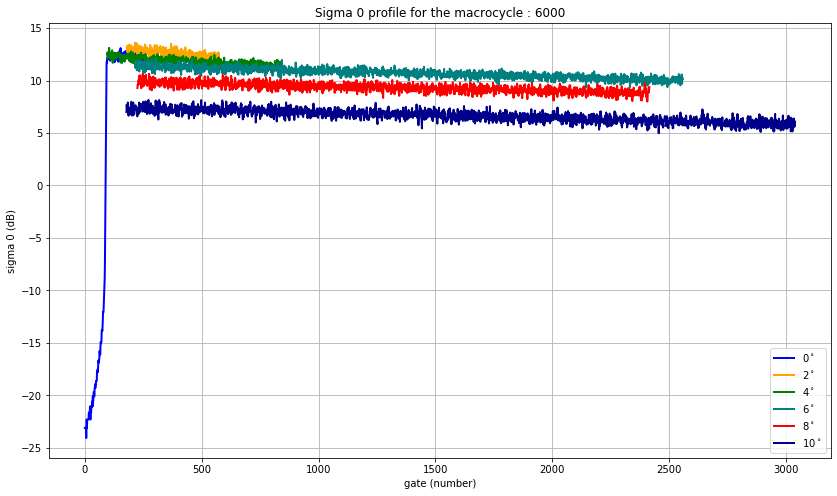

In [5]:
################################################################### Sigma0 profile visualization ######################################################

# set unique dimension for each x_axis 
XAXIS_REF = {0: {'name': 'gate', 'long_name': '', 'dimension': 'number'},
             1: {'name': 'incidence', 'long_name': 'incidence', 'dimension': 'deg'},
             2: {'name': 'elevation', 'long_name': 'elevation', 'dimension': 'deg'},
             3: {'name': 'radar range', 'long_name': 'radar_range', 'dimension': 'm'},
             4: {'name': 'ground range', 'long_name': 'ground_range', 'dimension': 'm'}}

# set unique color for each beam
BEAM_REF = {0: {'name': '0$^\circ$', 'color': 'blue'},
            1: {'name': '2$^\circ$', 'color': 'orange'},
            2: {'name': '4$^\circ$', 'color': 'green'},
            3: {'name': '6$^\circ$', 'color': 'teal'},
            4: {'name': '8$^\circ$', 'color': 'red'},
            5: {'name': '10$^\circ$', 'color': 'darkblue'}}

# plot sigma 0
fig = plt.figure(figsize=(14,8))
for i_beam in beam :
    # get y axis variable
    if unit_sigma0=='dB':
        y = 10.*np.log10(cdf.variables['echo_l1a_'+str(i_beam)][num_mcycle,:])
    elif unit_sigma0=='W':
        y = cdf.variables['echo_l1a_'+str(i_beam)][num_mcycle,:]
    # get x axis variable
    if x_axis==1 or x_axis==2:
        x = np.rad2deg(cdf.variables[XAXIS_REF[x_axis]['long_name']+'_'+str(i_beam)][num_mcycle,:])
    elif x_axis==3 or x_axis==4:
        x = cdf.variables[XAXIS_REF[x_axis]['long_name']+'_'+str(i_beam)][num_mcycle,:]
    # plot following the reliable_swath option
    if reliable_swath :
        flag = cdf.variables['reliable_swath_'+str(i_beam)][:]
        plt.plot(x[flag==1], y[flag==1], color=BEAM_REF[i_beam]['color'], label=BEAM_REF[i_beam]['name'], lw='2')
    else :
        plt.plot(x, y, color=BEAM_REF[i_beam]['color'], label=BEAM_REF[i_beam]['name'], lw='2')
plt.grid()
plt.legend(loc='best')
plt.xlabel(XAXIS_REF[x_axis]['name']+' ('+XAXIS_REF[x_axis]['dimension']+')')
plt.ylabel('sigma 0'+' ('+unit_sigma0+')')
plt.title('Sigma 0 profile for the macrocycle : '+str(num_mcycle))